## 2a

Training width=16 with best hyperparams...
Training epoch 1
train loss: 1.3218 | val loss: 1.0993 | val acc: 0.6841
Training epoch 2
train loss: 1.0244 | val loss: 0.9834 | val acc: 0.7163
Training epoch 3
train loss: 0.9414 | val loss: 0.9203 | val acc: 0.7336
Training epoch 4
train loss: 0.8852 | val loss: 0.8798 | val acc: 0.7439
Training epoch 5
train loss: 0.8456 | val loss: 0.8534 | val acc: 0.7463
Training epoch 6
train loss: 0.8243 | val loss: 0.8214 | val acc: 0.7612
Training epoch 7
train loss: 0.8044 | val loss: 0.8172 | val acc: 0.7567
Training epoch 8
train loss: 0.7898 | val loss: 0.7995 | val acc: 0.7665
Training epoch 9
train loss: 0.7771 | val loss: 0.7849 | val acc: 0.7684
Training epoch 10
train loss: 0.7674 | val loss: 0.7825 | val acc: 0.7693
Training epoch 11
train loss: 0.7598 | val loss: 0.7749 | val acc: 0.7756
Training epoch 12
train loss: 0.7531 | val loss: 0.7731 | val acc: 0.7724
Training epoch 13
train loss: 0.7491 | val loss: 0.7785 | val acc: 0.7674
Trai

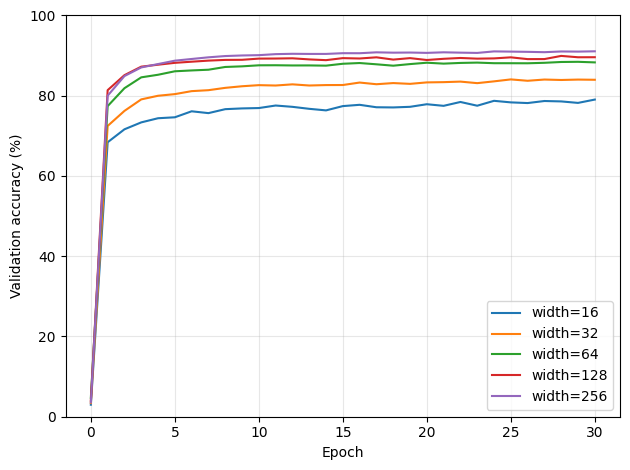

In [7]:
import csv
import torch
import utils
from hw1_ffn import run_experiment
import matplotlib.pyplot as plt

csv_path = "gridsearch_results_adam_relu.csv"

# hent beste config per width
best = {}
with open(csv_path) as f:
    reader = csv.DictReader(f)
    for r in reader:
        w = int(r["width"])
        val = float(r["best_val_acc"])
        if w not in best or val > best[w]["val"]:
            best[w] = {
                "width": w,
                "lr": float(r["learning_rate"]),
                "dropout": float(r["dropout"]),
                "l2": float(r["l2_decay"]),
                "val": val,
            }

# last data
data = utils.load_dataset("emnist-letters.npz")
dataset = utils.ClassificationDataset(data)

train_X, train_y = dataset.X, dataset.y
dev_X, dev_y = dataset.dev_X, dataset.dev_y
test_X, test_y = dataset.test_X, dataset.test_y

n_classes = torch.unique(train_y).numel()
n_feats = train_X.shape[1]

epochs = 30
batch_size = 64
optimizer = "adam"
activation = "relu"

curves = {}  # lagrer epoch→val_acc for plotting

for w in sorted(best.keys()):
    cfg = best[w]
    print(f"Training width={w} with best hyperparams...")

    res = run_experiment(
        n_classes=n_classes,
        n_feats=n_feats,
        dataset=dataset,
        train_X=train_X,
        train_y=train_y,
        dev_X=dev_X,
        dev_y=dev_y,
        test_X=test_X,
        test_y=test_y,
        batch_size=batch_size,
        hidden_size=w,
        layers=1,
        learning_rate=cfg["lr"],
        l2_decay=cfg["l2"],
        dropout=cfg["dropout"],
        activation=activation,
        optimizer_name=optimizer,
        epochs=epochs,
    )

    # lagre curve
    curves[w] = {
        "train_acc": res["train_accs"],
        "val_acc": res["valid_accs"],
    }

# -------- PLOTT ALL WIDTHS I ÉN FIGUR --------

plt.figure()
for w in sorted(curves.keys()):
    vals = [100*v for v in curves[w]["val_acc"]]
    plt.plot(range(len(vals)), vals, label=f"width={w}")

plt.xlabel("Epoch")
plt.ylabel("Validation accuracy (%)")
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2b

In [9]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

import utils
from hw1_ffn import run_experiment  # filnavn: hw1_ffn.py

# Les inn alle resultatene fra grid-søket
df = pd.read_csv("gridsearch_results_adam_relu.csv")

# Finn raden med høyest valideringsnøyaktighet
best_idx = df["best_val_acc"].idxmax()
best_row = df.loc[best_idx]

best_row


width            256.000000
learning_rate      0.000500
dropout            0.300000
l2_decay           0.000000
best_val_acc       0.910913
test_acc           0.906635
time_sec          55.143109
Name: 66, dtype: float64

In [10]:
# Bruk samme dataoppsett som i hw1-ffn.py
data = utils.load_dataset("emnist-letters.npz")
dataset = utils.ClassificationDataset(data)

train_X, train_y = dataset.X, dataset.y
dev_X, dev_y = dataset.dev_X, dataset.dev_y
test_X, test_y = dataset.test_X, dataset.test_y

n_classes = torch.unique(dataset.y).shape[0]
n_feats = dataset.X.shape[1]

print(f"n_classes = {n_classes}, n_feats = {n_feats}")

# Hyperparametre fra best_row
width       = int(best_row["width"])
lr          = float(best_row["learning_rate"])
dropout     = float(best_row["dropout"])
l2_decay    = float(best_row["l2_decay"])
batch_size  = 64      # som i oppgaven
layers      = 1       # én skjult layer i 2.2
activation  = "relu"  # grid-søket var med ReLU
optimizer   = "adam"  # grid-søket var med Adam
epochs      = 30

results = run_experiment(
    n_classes=n_classes,
    n_feats=n_feats,
    dataset=dataset,
    train_X=train_X,
    train_y=train_y,
    dev_X=dev_X,
    dev_y=dev_y,
    test_X=test_X,
    test_y=test_y,
    batch_size=batch_size,
    hidden_size=width,
    layers=layers,
    learning_rate=lr,
    l2_decay=l2_decay,
    dropout=dropout,
    activation=activation,
    optimizer_name=optimizer,
    epochs=epochs,
)

results["best_val_acc"], results["test_acc"]


n_classes = 26, n_feats = 784
Training epoch 1
train loss: 1.1195 | val loss: 0.6896 | val acc: 0.8043
Training epoch 2
train loss: 0.6579 | val loss: 0.5052 | val acc: 0.8514
Training epoch 3
train loss: 0.5358 | val loss: 0.4287 | val acc: 0.8724
Training epoch 4
train loss: 0.4726 | val loss: 0.3977 | val acc: 0.8773
Training epoch 5
train loss: 0.4377 | val loss: 0.3671 | val acc: 0.8872
Training epoch 6
train loss: 0.4098 | val loss: 0.3523 | val acc: 0.8925
Training epoch 7
train loss: 0.3901 | val loss: 0.3398 | val acc: 0.8946
Training epoch 8
train loss: 0.3751 | val loss: 0.3332 | val acc: 0.8967
Training epoch 9
train loss: 0.3590 | val loss: 0.3205 | val acc: 0.9021
Training epoch 10
train loss: 0.3494 | val loss: 0.3159 | val acc: 0.9019
Training epoch 11
train loss: 0.3416 | val loss: 0.3168 | val acc: 0.9023
Training epoch 12
train loss: 0.3288 | val loss: 0.3133 | val acc: 0.9031
Training epoch 13
train loss: 0.3213 | val loss: 0.3090 | val acc: 0.9052
Training epoch 14

(0.9104326923076923, 0.9097115384615385)

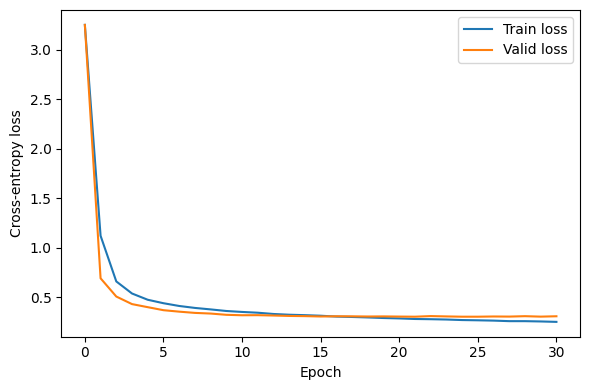

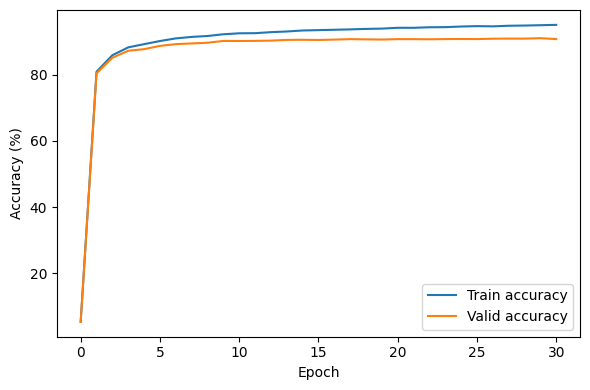

Best validation accuracy: 0.9104
Test accuracy:           0.9097


In [11]:
# Epoch-akse (inkluderer epoch 0-initialisering)
epochs_axis = range(len(results["train_losses"]))

train_losses = results["train_losses"]
valid_losses = results["valid_losses"]
train_accs   = results["train_accs"]
valid_accs   = results["valid_accs"]

# ---- Figur 1: Training/Validation loss ----
plt.figure(figsize=(6, 4))
plt.plot(epochs_axis, train_losses, label="Train loss")
plt.plot(epochs_axis, valid_losses, label="Valid loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")
plt.legend()
plt.tight_layout()
plt.show()

# ---- Figur 2: Training/Validation accuracy ----
plt.figure(figsize=(6, 4))
plt.plot(epochs_axis, [a * 100 for a in train_accs], label="Train accuracy")
plt.plot(epochs_axis, [a * 100 for a in valid_accs], label="Valid accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best validation accuracy: {results['best_val_acc']:.4f}")
print(f"Test accuracy:           {results['test_acc']:.4f}")


n_classes=26, n_feats=784

Training width=16: lr=0.002, dropout=0.0, l2=0.0001
Training epoch 1
train loss: 1.3379 | val loss: 1.1001 | val acc: 0.6853
Training epoch 2
train loss: 1.0387 | val loss: 1.0159 | val acc: 0.7081
Training epoch 3
train loss: 0.9566 | val loss: 0.9385 | val acc: 0.7292
Training epoch 4
train loss: 0.9129 | val loss: 0.9284 | val acc: 0.7322
Training epoch 5
train loss: 0.8851 | val loss: 0.8914 | val acc: 0.7351
Training epoch 6
train loss: 0.8626 | val loss: 0.8788 | val acc: 0.7438
Training epoch 7
train loss: 0.8351 | val loss: 0.8488 | val acc: 0.7521
Training epoch 8
train loss: 0.8157 | val loss: 0.8256 | val acc: 0.7606
Training epoch 9
train loss: 0.7988 | val loss: 0.8130 | val acc: 0.7654
Training epoch 10
train loss: 0.7834 | val loss: 0.8085 | val acc: 0.7670
Training epoch 11
train loss: 0.7692 | val loss: 0.7897 | val acc: 0.7717
Training epoch 12
train loss: 0.7577 | val loss: 0.7832 | val acc: 0.7697
Training epoch 13
train loss: 0.7473 | val

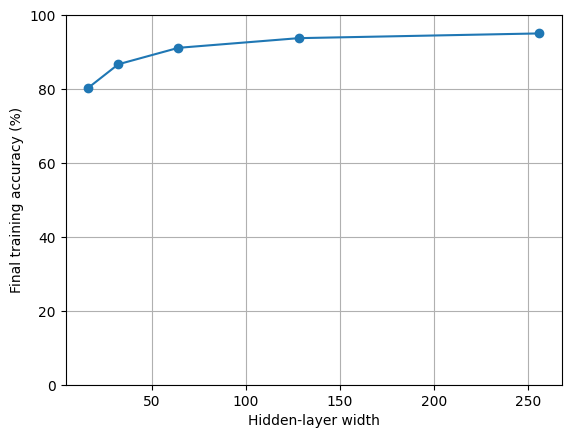

width=16: final train acc=80.32%, lr=0.002, dropout=0.0, l2=0.0001
width=32: final train acc=86.70%, lr=0.001, dropout=0.0, l2=0.0
width=64: final train acc=91.15%, lr=0.001, dropout=0.0, l2=0.0001
width=128: final train acc=93.77%, lr=0.001, dropout=0.0, l2=0.0001
width=256: final train acc=95.05%, lr=0.0005, dropout=0.3, l2=0.0


In [13]:
import sys
import importlib.util
from pathlib import Path

import torch
import pandas as pd
import matplotlib.pyplot as plt

import utils

spec = importlib.util.spec_from_file_location("hw1_ffn", "hw1-ffn.py")
hw1_ffn = importlib.util.module_from_spec(spec)
sys.modules["hw1_ffn"] = hw1_ffn
spec.loader.exec_module(hw1_ffn)

FeedforwardNetwork = hw1_ffn.FeedforwardNetwork
run_experiment = hw1_ffn.run_experiment  


data = utils.load_dataset("emnist-letters.npz")
dataset = utils.ClassificationDataset(data)

train_X, train_y = dataset.X, dataset.y
dev_X, dev_y = dataset.dev_X, dataset.dev_y
test_X, test_y = dataset.test_X, dataset.test_y

n_classes = torch.unique(dataset.y).shape[0]
n_feats = dataset.X.shape[1]

print(f"n_classes={n_classes}, n_feats={n_feats}")

df = pd.read_csv("gridsearch_results_adam_relu.csv")

widths = [16, 32, 64, 128, 256]

final_train_accs = []
best_rows = []

for w in widths:
    sub = df[df["width"] == w]
    best_row = sub.loc[sub["best_val_acc"].idxmax()]
    best_rows.append(best_row)

    lr = float(best_row["learning_rate"])
    dropout = float(best_row["dropout"])
    l2 = float(best_row["l2_decay"])

    print(f"\nTraining width={w}: lr={lr}, dropout={dropout}, l2={l2}")

    results = run_experiment(
        n_classes=n_classes,
        n_feats=n_feats,
        dataset=dataset,
        train_X=train_X,
        train_y=train_y,
        dev_X=dev_X,
        dev_y=dev_y,
        test_X=test_X,
        test_y=test_y,
        batch_size=64,
        hidden_size=w,
        layers=1,
        learning_rate=lr,
        l2_decay=l2,
        dropout=dropout,
        activation="relu",      
        optimizer_name="adam",  
        epochs=30,
    )

    final_train_accs.append(results["train_accs"][-1])

widths_list = widths
train_acc_percent = [100 * a for a in final_train_accs]

plt.figure()
plt.plot(widths_list, train_acc_percent, marker="o")
plt.xlabel("Hidden-layer width")
plt.ylabel("Final training accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)

Path("Images").mkdir(exist_ok=True)
plt.show()

for w, row, acc in zip(widths_list, best_rows, train_acc_percent):
    print(
        f"width={w}: final train acc={acc:.2f}%, "
        f"lr={row['learning_rate']}, dropout={row['dropout']}, l2={row['l2_decay']}"
    )


## 3a

In [15]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

import utils
from hw1_ffn import run_experiment   # samme funksjon som i 2a/2b

# ---------------------------------------------------------
# 1) Last inn data (samme som før)
# ---------------------------------------------------------
data = utils.load_dataset("emnist-letters.npz")
dataset = utils.ClassificationDataset(data)

train_X, train_y = dataset.X, dataset.y
dev_X, dev_y     = dataset.dev_X, dataset.dev_y
test_X, test_y   = dataset.test_X, dataset.test_y

n_classes = torch.unique(dataset.y).shape[0]
n_feats   = dataset.X.shape[1]

print("n_features:", n_feats, " n_classes:", n_classes)

# ---------------------------------------------------------
# 2) Oppgave 3(a): kjør modeller med ulik dybde
# ---------------------------------------------------------

depths = [1, 3, 5, 7, 9]

# hyperparametre = beste config for width=32 fra 2(a)
batch_size     = 64
hidden_size    = 32          # fast
learning_rate  = 0.001
dropout        = 0.0
l2_decay       = 0.0
activation     = "relu"
optimizer_name = "adam"
epochs         = 30

results_depth = {}

for L in depths:
    print(f"\n=== Training model with depth L={L} ===")
    r = run_experiment(
        n_classes=n_classes,
        n_feats=n_feats,
        dataset=dataset,
        train_X=train_X,
        train_y=train_y,
        dev_X=dev_X,
        dev_y=dev_y,
        test_X=test_X,
        test_y=test_y,
        batch_size=batch_size,
        hidden_size=hidden_size,
        layers=L,                  # <- dybden vi varierer
        learning_rate=learning_rate,
        l2_decay=l2_decay,
        dropout=dropout,
        activation=activation,
        optimizer_name=optimizer_name,
        epochs=epochs,
    )
    results_depth[L] = r



# Table with results per depth
rows = []
for L in depths:
    r = results_depth[L]
    best_val = max(r["valid_accs"])
    rows.append({
        "depth": L,
        "best_val_acc": best_val,
        "test_acc": r["test_acc"],
        "final_train_acc": r["train_accs"][-1],
    })

df_depth = pd.DataFrame(rows)
df_depth

df_depth.to_csv("depth_results_32units_adam_relu.csv", index=False)
print(df_depth)


n_features: 784  n_classes: 26

=== Training model with depth L=1 ===
Training epoch 1
train loss: 1.2331 | val loss: 0.9417 | val acc: 0.7320
Training epoch 2
train loss: 0.8628 | val loss: 0.8124 | val acc: 0.7662
Training epoch 3
train loss: 0.7509 | val loss: 0.7248 | val acc: 0.7917
Training epoch 4
train loss: 0.6838 | val loss: 0.6761 | val acc: 0.8042
Training epoch 5
train loss: 0.6413 | val loss: 0.6469 | val acc: 0.8092
Training epoch 6
train loss: 0.6130 | val loss: 0.6447 | val acc: 0.8128
Training epoch 7
train loss: 0.5922 | val loss: 0.6177 | val acc: 0.8177
Training epoch 8
train loss: 0.5770 | val loss: 0.6002 | val acc: 0.8246
Training epoch 9
train loss: 0.5633 | val loss: 0.5938 | val acc: 0.8242
Training epoch 10
train loss: 0.5531 | val loss: 0.5883 | val acc: 0.8263
Training epoch 11
train loss: 0.5443 | val loss: 0.5803 | val acc: 0.8317
Training epoch 12
train loss: 0.5354 | val loss: 0.5774 | val acc: 0.8295
Training epoch 13
train loss: 0.5280 | val loss: 0.

## 3b

Best depth: 3
Best validation accuracy: 0.8670673076923077
Test accuracy: 0.8652403846153847


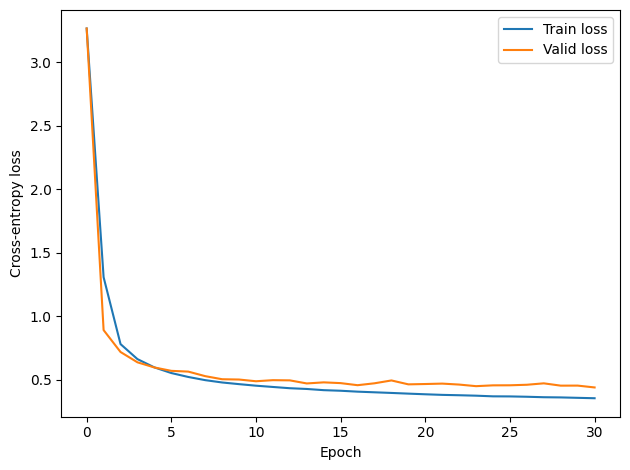

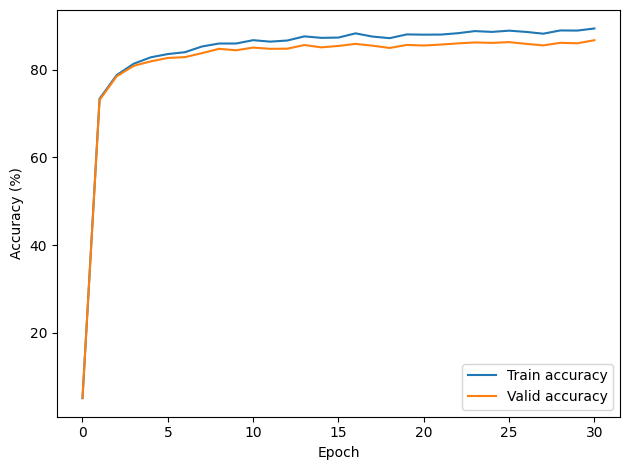

In [16]:
# ---------------------------------------------------------
# 3) Oppgave 3(b): finn beste depth og plott curves
# ---------------------------------------------------------

# finn raden med høyest best_val_acc
best_row = df_depth.loc[df_depth["best_val_acc"].idxmax()]
best_depth = int(best_row["depth"])
print("Best depth:", best_depth)
print("Best validation accuracy:", best_row["best_val_acc"])
print("Test accuracy:", best_row["test_acc"])

r_best = results_depth[best_depth]

epochs_axis = range(len(r_best["train_losses"]))

# --- plot loss curves ---
plt.figure()
plt.plot(epochs_axis, r_best["train_losses"], label="Train loss")
plt.plot(epochs_axis, r_best["valid_losses"], label="Valid loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")
plt.legend()
plt.tight_layout()

# --- plot accuracy curves ---
plt.figure()
plt.plot(epochs_axis, [a*100 for a in r_best["train_accs"]], label="Train accuracy")
plt.plot(epochs_axis, [a*100 for a in r_best["valid_accs"]], label="Valid accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.tight_layout()


## 3c

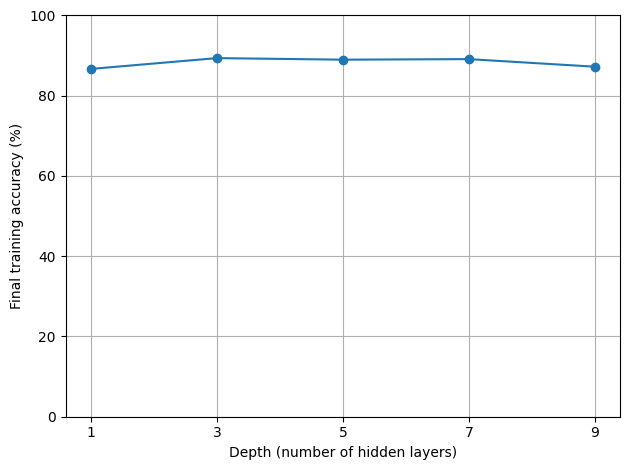

In [ ]:
# ---------------------------------------------------------
# 4) Oppgave 3(c): final training accuracy vs depth
# ---------------------------------------------------------

final_train_accs = [df_depth[df_depth["depth"] == L]["final_train_acc"].values[0] for L in depths]

plt.figure()
plt.plot(depths, [a*100 for a in final_train_accs], marker="o", linestyle="-", color="b")
plt.xlabel("Depth (number of hidden layers)")
plt.ylabel("Final training accuracy (%)")
plt.xticks(depths)
plt.ylim(0, 100)
plt.tight_layout()
plt.grid(True)
plt.show()

